# Regression Workbook 

The purpose of this problem set is to put your regression skills to the test. As a GA student of data science, you have covered a number of sklearn regression techniques, so now is your chance to apply them. We'll be using the Boston Housing Dataset. Just kidding. I know you hate that one. 

We'll be exploring the relationships between sugar, economics, and teeth. You are given a dataset containing sugar consuption, healthcare spending, per capita GDP, literacy rate and the number of bad teeth per child across several hundred countries. What do you think? If you get richer, do your teeth get worse from more sugary foods, or better with health care assistance? Does education improve health, or drive excess? 

<img src='https://raw.githubusercontent.com/momonala/DS_tutorials/master/files/brush.gif' width='150'>

You'll be implementing some of the techniques you've learned in class with hypothesis testing, exploratory analysis, and regression. A few questions to consider: 
 
    1) What questions are relevant to ask? How do explore these your initial analysis?
    2) How can you optimize on the default regression techniques? 
    3) How can you effectively visualize and explain the relationships?
    
I've provided some imports and starter code to get you going.

If you get stuck, remember the options you have. Talk to your neighbors, check out StackOverflow and blogs (I recommend Googling your question with the term blog.yhat), and run '?' on functions for docstrings. 

In [1]:
# ex. 
max?

# Exploratory Analysis 

In [111]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn import preprocessing, neighbors, model_selection

In [53]:
df = pd.read_csv("data/dental_economics.csv")

In [ ]:
#TO DO: 
# perform exploratory analysis. Clean the data as necessary and use correlation to find relevant features. 
# check the distributions of the data. Write a sentence about the distribution. 

In [4]:
df

,Country,badteeth,literacy_avg,GDP_avg,sugar_avg,health_avg
0,Saudi Arabia,5.90,80.046624,10460.159370,63.511591,282.826662
1,Guatemala,5.20,69.723543,1487.355625,97.758182,44.111681
2,Mauritius,4.90,84.339633,3074.829677,120.550000,100.265111
3,Brunei,4.80,88.439129,20991.519650,108.220000,549.706067
4,Bosnia and Herzegovina,4.80,97.332859,1590.190034,45.101538,132.698130
5,Bolivia,4.70,83.755499,1003.185864,75.776591,39.160258
6,Gabon,4.40,81.674407,4279.960699,38.482045,73.898363
7,Bulgaria,4.40,98.278002,1764.217503,88.168636,130.622897
8,Ukraine,4.40,99.574575,966.073658,114.437692,61.854231
9,India,3.94,55.101834,341.579042,56.663636,7.254130


In [122]:
df.describe()

,badteeth,literacy_avg,GDP_avg,sugar_avg,health_avg
count,121.000000,121.000000,121.000000,121.000000,121.000000
mean,2.078099,78.165821,3038.871018,69.238413,170.912344
std,1.217042,20.786888,4993.960158,39.086482,279.593892
min,0.300000,18.201399,139.937213,2.677727,2.155842
25%,1.180000,66.641822,447.218705,36.740682,16.922464
50%,1.900000,83.755499,1277.797569,70.110682,66.530291
75%,2.800000,96.273284,3240.432619,98.567727,180.832570
max,5.900000,99.763509,38226.277040,156.538636,1705.243078


In [6]:
df.isnull().sum()

Country         0
badteeth        0
literacy_avg    0
GDP_avg         0
sugar_avg       0
health_avg      0
dtype: int64

In [10]:
df.dtypes

Country          object
badteeth        float64
literacy_avg    float64
GDP_avg         float64
sugar_avg       float64
health_avg      float64
dtype: object

In [14]:
df.corr()

,badteeth,literacy_avg,GDP_avg,sugar_avg,health_avg
badteeth,1.000000,0.386415,0.130030,0.341168,0.042692
literacy_avg,0.386415,1.000000,0.270349,0.594290,0.380230
GDP_avg,0.130030,0.270349,1.000000,0.381424,0.704342
sugar_avg,0.341168,0.594290,0.381424,1.000000,0.370900
health_avg,0.042692,0.380230,0.704342,0.370900,1.000000


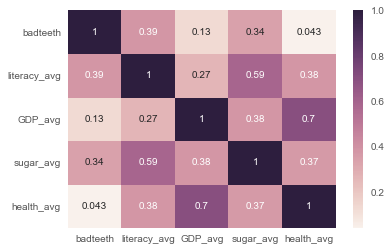

In [17]:
sns.heatmap(df.corr(), vmax=1, annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f3ffa90>]], dtype=object)

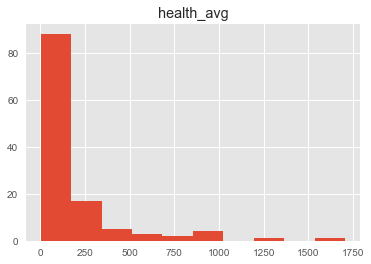

In [54]:
df.hist('health_avg')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f2e05d0>]], dtype=object)

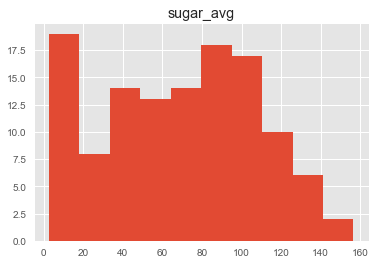

In [55]:
df.hist('sugar_avg')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f749290>]], dtype=object)

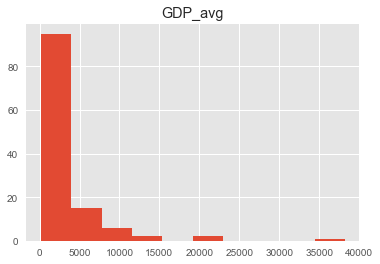

In [56]:
df.hist('GDP_avg')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f508250>]], dtype=object)

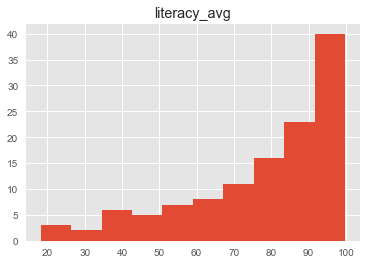

In [57]:
df.hist('literacy_avg')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f98fed0>]], dtype=object)

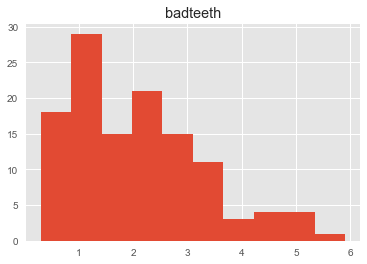

In [59]:
df.hist('badteeth')

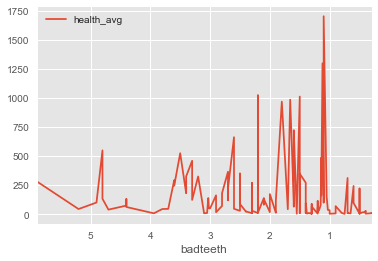

In [64]:
df.plot (x='badteeth', y='health_avg')

In [110]:
columns_X = ['badteeth', 'health_avg', 'GDP_avg', 'literacy_avg', 'sugar_avg']
X = df[columns_X]

scaler = preprocessing.MinMaxScaler().fit(X)

X = scaler.transform(X)

df2 = pd.DataFrame(data=X, index=None, columns=['badteeth', 'health_avg', 'GDP_avg', 'literacy_avg', 'sugar_avg'])
df2['Country'] = df.Country
df2


,badteeth,health_avg,GDP_avg,literacy_avg,sugar_avg,Country
0,1.000000,0.164801,0.270969,0.758259,0.395382,Saudi Arabia
1,0.875000,0.024635,0.035378,0.631692,0.617964,Guatemala
2,0.821429,0.057607,0.077059,0.810894,0.766096,Mauritius
3,0.803571,0.321505,0.547482,0.861156,0.685959,Brunei
4,0.803571,0.076650,0.038078,0.970199,0.275728,Bosnia and Herzegovina
5,0.785714,0.021728,0.022666,0.803732,0.475097,Bolivia
6,0.732143,0.042125,0.108701,0.778217,0.232706,Gabon
7,0.732143,0.075432,0.042647,0.981787,0.555638,Bulgaria
8,0.732143,0.035053,0.021691,0.997684,0.726370,Ukraine
9,0.650000,0.002994,0.005294,0.452421,0.350875,India


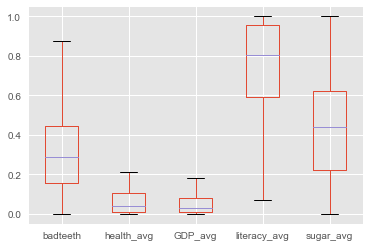

In [98]:
df2.boxplot(['badteeth', 'health_avg', 'GDP_avg', 'literacy_avg', 'sugar_avg'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12c00f990>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12b5ea2d0>]], dtype=object)

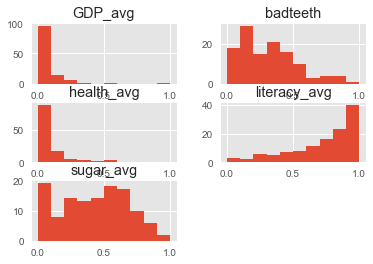

In [104]:
df2.hist(['badteeth', 'health_avg', 'GDP_avg', 'literacy_avg', 'sugar_avg'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12c0b4910>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12c937350>]], dtype=object)

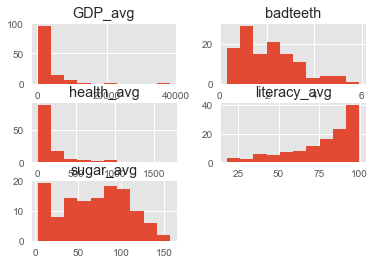

In [106]:
df.hist(['badteeth', 'health_avg', 'GDP_avg', 'literacy_avg', 'sugar_avg'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12bd1fa90>]], dtype=object)

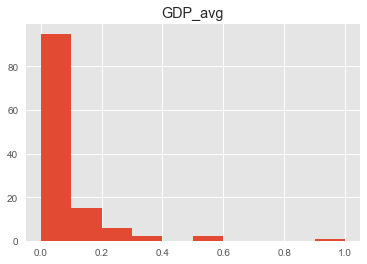

In [99]:
df2.hist('GDP_avg')

In [150]:
color = df2.Country.map({'badteeth': 'yellow', 'literacy_avg': 'red', 'GDP_avg': 'blue', 'sugar_avg': 'green', 'health_avg': 'orange'})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12e77b950>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12f313a50>]], dtype=object)

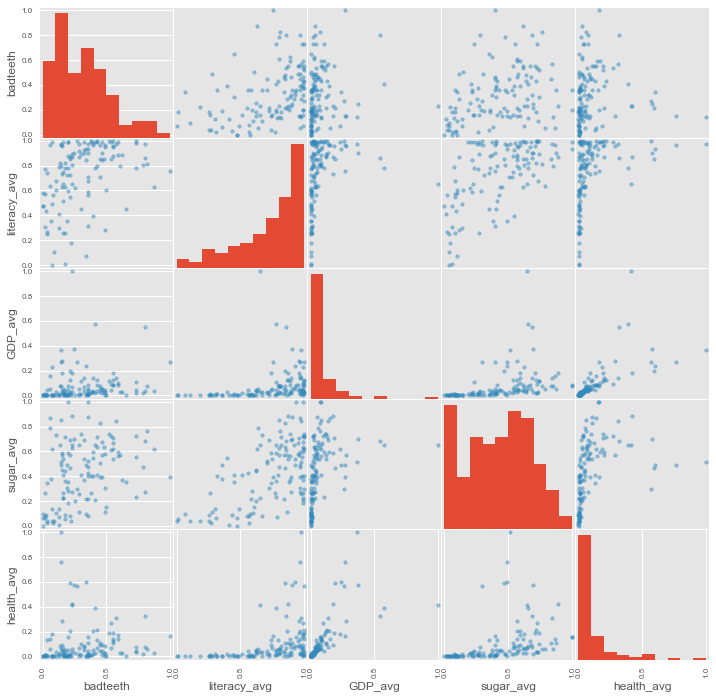

In [151]:
pd.tools.plotting.scatter_matrix(
    df2[ ['badteeth', 'literacy_avg', 'GDP_avg', 'sugar_avg', 'health_avg'] ],
    diagonal = 'hist', figsize = (12, 12)
)

### Exercises:
##### --Double click this cell to answer-- 

1)  Describe the features of the data set. Did you find anything unique to them?

Answer: 6 columns with 121 rows and 0 missing vaules. There is nothing unique about this dataset except that the country is an object, and all of the others columns are floats.

2)  Describe the correlations you found. 

Answer: It seems like there is a strong correlation between health_avg and GDP_avg, and sugar_avg and literacy_avg

3)  Describe the distributions of the data. 

Answer: sugar_avg is the most normally distributed columns compared to the others.

4)  Describe any assumptions you are making. How will these affect your research?

Answer: One assumption that i have is that there is a relationship between literacy_avg, sugar_avg, and badteeth.

1) In your own words, explain the difference between correlation and regression. Explain a few advantages and disadvantages to each. Compare results with your table: 

Answer:  

# Hypothesis
You've seen the data. What are the features and what is the output? Explain your hypotheses here: 

### H0: 

### H1: 



# Build your models 

In [112]:
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import  train_test_split

In [171]:
model = smf.ols(formula = 'badteeth ~ literacy_avg + sugar_avg * GDP_avg * health_avg', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               badteeth   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     6.278
Date:                Wed, 14 Jun 2017   Prob (F-statistic):           1.06e-06
Time:                        21:04:03   Log-Likelihood:                -172.54
No. Observations:                 121   AIC:                             363.1
Df Residuals:                     112   BIC:                             388.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        0.0636      0.401      0.159      0.874      -0.730       0.857
literacy_avg                     0.0120      0.006      1.913      0.058      -0.000       0.025
sugar_avg                        0.0145      0.005      2.993      0.003       0.005       0.024
GDP_avg                          0.0010      0.000      3.915      0.000       0.001       0.002
sugar_avg:GDP_avg            -1.003e-05   2.75e-06     -3.641      0.000   -1.55e-05   -4.57e-06
health_avg                      -0.0027      0.005     -0.552      0.582      -0.012       0.007
sugar_avg:health_avg          2.152e-05   4.68e-05      0.460      0.647   -7.13e-05       0.000
GDP_avg:health_avg           -7.588e-07    4.6e-07     -1.648      0.102   -1.67e-06    1.53e-07
sugar_avg:GDP_avg:health_avg  7.739e-09   4.83e-09      1.603      0.112   -1.83e-09    1.73e-08
==============================================================================
Omnibus:                        9.293   Durbin-Watson:                   0.578
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                9.192
Skew:                           0.646   Prob(JB):                       0.0101
Kurtosis:                       3.394   Cond. No.                     1.77e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Spot Check 

How's the model building coming? Have you identifyed some features of interest and noticed any trends? If so, put them into words. 

### Noticeable Trends: 

1) 

2) 

3) 


# Optimization

Time to fine tune the model. What hyperparameters exist in your model? How do you tune these hyperparameters? Also, how can you test for overfitting, and how will you reduce it if you see it? Implement below. 

Evaluate your models again. How do different hyperparameters change your predictive performance? Again, explain in a few words.

In [ ]:
# TO DO:
# fill in the correct values for the hyperparameter testing. 

for INPUT HYPERPARAMTER in range(INPUT RANGE):
    model = 
    #TO DO: test hyperparameters 

# Final Conclusions

If a data scientist makes a brilliant conclusion but can't communicate effectively, did they ever make a conclusion?  

Explain your findings to a person with a math/stats background. Reference your H1/H0 hypotheses:

Answer: 

Now explain them to a person who hates math:

Answer: 
